# Spatial mapping amplitudes and their ratios vs $t_0$: memory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfits
import CCE
from qnmfits.spatial_mapping_functions import *
from matplotlib.lines import Line2D

plt.style.use("stylesheet.mplstyle")
fig_width = 246.0 * (1.0 / 72.27)
fig_height = fig_width / 1.618

In [2]:
id = "0004"
sim_main = CCE.SXS_CCE(id)

In [3]:
l_max = 8
n_max = 7

start = -30
stop = 100
dt = 1

peak_time = 26.0

mapping = [(2, 2, 0, 1, 2, -2, 0, -1)]

In [4]:
start_times = np.arange(start, stop, dt)
time_index = np.abs(start_times - peak_time).argmin()
decay_time = qnmfits.qnm.omega_list([mapping[0]], sim_main.chif_mag, sim_main.Mf)[0].imag

QNMs = [
    (lam, mu, n, p) for lam in np.arange(2, l_max + 1) for mu in np.arange(-lam, lam + 1) for n in np.arange(0, n_max + 1) for p in (-1, +1)
] + mapping

spherical_modes = [(l, m) for l in range(2, l_max + 1) for m in range(-l, l + 1)]

lp, mp, nprime, pp, lpp, mpp, npp, ppp = mapping[0]
l = 2
m = 0

sphindex22 = spherical_modes.index((l, m))
sphindex32 = spherical_modes.index((l + 1, m))
sphindex42 = spherical_modes.index((l + 2, m))

indices22 = [(l, m) + mapping[0]]
indices32 = [(l + 1, m) + mapping[0]]
indices42 = [(l + 2, m) + mapping[0]]

In [5]:
amplitude_arrays = {}

for lev in ["Lev4", "Lev5"]:
    for rad in ["R2", "R3"]:

        name = f"{lev}_{rad}"
        print(name)
        amplitude_array = np.zeros((len(start_times), len(spherical_modes)))

        sim = CCE.SXS_CCE(id, lev=lev, radius=rad)

        for i, step in enumerate(start_times):

            best_fit = mapping_multimode_ringdown_fit(
                sim.times,
                sim.h,
                modes=QNMs.copy(),
                Mf=sim.Mf,
                chif=sim.chif_mag,
                t0=step,
                mapping_modes=mapping,
                spherical_modes=spherical_modes.copy(),
            )

            amplitude_array[i, :] = np.abs(best_fit["C"][len(QNMs) - 1 :])

        amplitude_arrays[name] = amplitude_array

Lev4_R2
Lev4_R3
Lev5_R2
Lev5_R3


In [6]:
min_prediction22 = amplitude_arrays["Lev5_R2"][:, sphindex22]
max_prediction22 = amplitude_arrays["Lev5_R2"][:, sphindex22]
min_prediction32 = amplitude_arrays["Lev5_R2"][:, sphindex32]
max_prediction32 = amplitude_arrays["Lev5_R2"][:, sphindex32]
min_prediction42 = amplitude_arrays["Lev5_R2"][:, sphindex42]
max_prediction42 = amplitude_arrays["Lev5_R2"][:, sphindex42]

for lev in ["Lev4", "Lev5"]:
    for rad in ["R2", "R3"]:
        min_prediction22 = np.minimum(min_prediction22, amplitude_arrays[f"{lev}_{rad}"][:, sphindex22])
        max_prediction22 = np.maximum(max_prediction22, amplitude_arrays[f"{lev}_{rad}"][:, sphindex22])
        min_prediction32 = np.minimum(min_prediction32, amplitude_arrays[f"{lev}_{rad}"][:, sphindex32])
        max_prediction32 = np.maximum(max_prediction32, amplitude_arrays[f"{lev}_{rad}"][:, sphindex32])
        min_prediction42 = np.minimum(min_prediction42, amplitude_arrays[f"{lev}_{rad}"][:, sphindex42])
        max_prediction42 = np.maximum(max_prediction42, amplitude_arrays[f"{lev}_{rad}"][:, sphindex42])

min_ratio1 = [abs(a / b) for a, b in zip(min_prediction22, max_prediction32)]
max_ratio1 = [abs(a / b) for a, b in zip(max_prediction22, min_prediction32)]
min_ratio2 = [abs(a / b) for a, b in zip(min_prediction22, max_prediction42)]
max_ratio2 = [abs(a / b) for a, b in zip(max_prediction22, min_prediction42)]

In [7]:
alpha22c = Qmu_B(indices22, sim_main.chif_mag, l_max, s1=-2, s2=0, s3=-2)[0]
alpha22d = Qmu_B(indices22, sim_main.chif_mag, l_max, s1=-1, s2=-1, s3=-2)[0]
alpha22e = Qmu_C(indices22, sim_main.chif_mag, l_max)[0]
alpha22f = Qmu_D(indices22, sim_main.chif_mag, l_max)[0]

alpha32c = Qmu_B(indices32, sim_main.chif_mag, l_max, s1=-2, s2=0, s3=-2)[0]
alpha32d = Qmu_B(indices32, sim_main.chif_mag, l_max, s1=-1, s2=-1, s3=-2)[0]
alpha32e = Qmu_C(indices32, sim_main.chif_mag, l_max)[0]
alpha32f = Qmu_D(indices32, sim_main.chif_mag, l_max)[0]

alpha42c = Qmu_B(indices42, sim_main.chif_mag, l_max, s1=-2, s2=0, s3=-2)[0]
alpha42d = Qmu_B(indices42, sim_main.chif_mag, l_max, s1=-1, s2=-1, s3=-2)[0]
alpha42e = Qmu_C(indices42, sim_main.chif_mag, l_max)[0]
alpha42f = Qmu_D(indices42, sim_main.chif_mag, l_max)[0]

/tmp/ipykernel_1963064/1063154448.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("viridis", 5)
/tmp/ipykernel_1963064/1063154448.py:81: RuntimeWarning: invalid value encountered in scalar divide
  ax[1].axhline(y=abs(alpha22f / alpha32f), color=colors(4), linestyle="--", label=r"D")


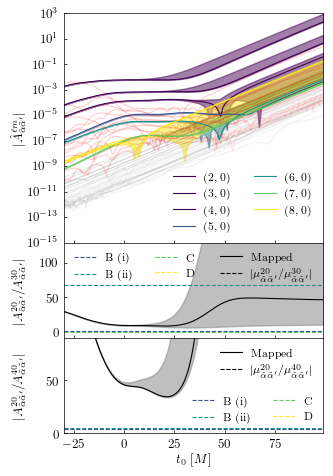

In [8]:
fig, ax = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(fig_width, fig_height * 2.3),
    sharex=True,
    gridspec_kw={"height_ratios": [2.4, 1, 1], "wspace": 0, "hspace": 0},
)

colors = plt.cm.get_cmap("viridis", 5)

for col_index in range(amplitude_array.shape[1]):
    l_i, m_i = spherical_modes[col_index]
    C = amplitude_arrays["Lev5_R2"][:, col_index]
    C_tau = C * np.exp(decay_time * (peak_time - start_times))
    if m_i != m:
        if m_i % 2 == 0:
            alpha = 0.1
            color = "r"
            label = None
        else:
            alpha = 0.1
            color = "grey"
            label = None

        ax[0].plot(start_times, C_tau, alpha=alpha, label=label, color=color)


for col_index in range(amplitude_array.shape[1]):
    l_i, m_i = spherical_modes[col_index]
    C = amplitude_arrays["Lev5_R2"][:, col_index]
    C_tau = C * np.exp(decay_time * (peak_time - start_times))
    if m_i == m:
        alpha = 1
        color = colors(l_i - 4)
        label = f"{spherical_modes[col_index]}"

        min_prediction = amplitude_arrays["Lev5_R2"][:, col_index]
        max_prediction = amplitude_arrays["Lev5_R2"][:, col_index]

        for lev in ["Lev4", "Lev5"]:
            for rad in ["R2", "R3"]:
                min_prediction = np.minimum(min_prediction, amplitude_arrays[f"{lev}_{rad}"][:, col_index])
                max_prediction = np.maximum(max_prediction, amplitude_arrays[f"{lev}_{rad}"][:, col_index])

        ax[0].fill_between(
            start_times,
            min_prediction * np.exp(decay_time * (peak_time - start_times)),
            max_prediction * np.exp(decay_time * (peak_time - start_times)),
            alpha=0.5,
            color=color,
        )

        ax[0].plot(start_times, C_tau, alpha=alpha, label=label, color=color)

ax[0].set_ylabel(r"$|\hat{A}^{\ell m}_{\Tilde{\alpha}\Tilde{\alpha}'}|$")
ax[0].set_yscale("log")
ax[0].legend(loc="lower right", ncol=2)
ax[0].set_ylim(1e-15, 1e3)

amplitudes22 = amplitude_arrays["Lev5_R2"][:, sphindex22]
amplitudes32 = amplitude_arrays["Lev5_R2"][:, sphindex32]
amplitudes42 = amplitude_arrays["Lev5_R2"][:, sphindex42]

ratio1 = [abs(a / b) for a, b in zip(amplitudes22, amplitudes32)]
ax[1].plot(np.arange(start, stop, dt), ratio1, c="k")
ax[1].fill_between(start_times, min_ratio1, max_ratio1, color="grey", alpha=0.5)

ratio2 = [abs(a / b) for a, b in zip(amplitudes22, amplitudes42)]
ax[2].plot(np.arange(start, stop, dt), ratio2, c="k")
ax[2].fill_between(start_times, min_ratio2, max_ratio2, color="grey", alpha=0.5)

ax[1].axhline(y=abs(alpha22c / alpha32c), color=colors(1), linestyle="--", label=r"B (i)")
ax[2].axhline(y=abs(alpha22c / alpha42c), color=colors(1), linestyle="--", label=r"B (i)")

ax[1].axhline(y=abs(alpha22d / alpha32d), color=colors(2), linestyle="--", label=r"B (ii)")
ax[2].axhline(y=abs(alpha22d / alpha42d), color=colors(2), linestyle="--", label=r"B (ii)")

ax[1].axhline(y=abs(alpha22e / alpha32e), color=colors(3), linestyle="--", label=r"C")
ax[2].axhline(y=abs(alpha22e / alpha42e), color=colors(3), linestyle="--", label=r"C")

ax[1].axhline(y=abs(alpha22f / alpha32f), color=colors(4), linestyle="--", label=r"D")
ax[2].axhline(y=abs(alpha22f / alpha42f), color=colors(4), linestyle="--", label=r"D")

ax[1].set_ylabel(r"$|A^{20}_{\Tilde{\alpha}\Tilde{\alpha}'}/A^{30}_{\Tilde{\alpha}\Tilde{\alpha}'}|$")
ax[2].set_ylabel(r"$|A^{20}_{\Tilde{\alpha}\Tilde{\alpha}'}/A^{40}_{\Tilde{\alpha}\Tilde{\alpha}'}|$")

ax[2].set_xlim(start_times[0], start_times[-1])
ax[2].set_xlabel("$t_0 \ [M]$")

solid_line1 = Line2D([0], [0], color="black", linestyle="-")
dashed_line1 = Line2D([0], [0], color="black", linestyle="--")
color_legend1 = ax[1].legend(ncol=2, frameon=False, loc="upper left")
line_legend1 = ax[1].legend(
    [solid_line1, dashed_line1],
    [
        "Mapped",
        r"$|\mu^{20}_{\Tilde{\alpha}\Tilde{\alpha}'}/\mu^{30}_{\Tilde{\alpha}\Tilde{\alpha}'}|$",
    ],
    frameon=False,
    loc="upper right",
)
ax[1].add_artist(color_legend1)

solid_line2 = Line2D([0], [0], color="black", linestyle="-")
dashed_line2 = Line2D([0], [0], color="black", linestyle="--")
color_legend2 = ax[2].legend(ncol=2, frameon=False, loc="lower right")
line_legend2 = ax[2].legend(
    [solid_line2, dashed_line2],
    [
        "Mapped",
        r"$|\mu^{20}_{\Tilde{\alpha}\Tilde{\alpha}'}/\mu^{40}_{\Tilde{\alpha}\Tilde{\alpha}'}|$",
    ],
    frameon=False,
    loc="upper right",
)
ax[2].add_artist(color_legend2)

ax[1].set_ylim(-9, 130)
ax[2].set_ylim(0, 90)

ax[0].yaxis.set_label_coords(-0.15, 0.5)
ax[1].yaxis.set_label_coords(-0.15, 0.5)
ax[2].yaxis.set_label_coords(-0.15, 0.5)

fig.savefig("figs/amplitude_ratios_t0_memory.pdf", bbox_inches="tight")